# LAB 1

## Exercise 1
### Question 1

In [1]:
import numpy as np
from scipy import linalg
import math
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
from itertools import combinations 

In [2]:
# Password
x = np.array([1,0,1,1,1])

# Challenge Vectors
c1, c2 = np.array([0,1,0,1,1]), np.array([1,1,1,1,0])

# Correct Response Function
def challenge_response(x, c):
    response = np.dot(x, c) % 2
    return response
b_1 = challenge_response(x, c1)
b_2 = challenge_response(x, c2)

print(f"𝛽1 = {b_1}")
print(f"𝛽2 = {b_2}")

𝛽1 = 0
𝛽2 = 1


### Question 2

#### Since Eve knows 𝛽1, 𝛽2, c1 and c2, when she received a challenge vector of (c1 + c2), she can deduce that the response to the challenge is simply (𝛽1 + 𝛽2) = 0 + 1 = 1.

In [3]:
def add_vectors(v1, v2):
    return [(bit1+bit2)%2 for bit1, bit2 in zip(v1,v2)]
eve_response = challenge_response(x, add_vectors(c1, c2))
print(f"Eve's response = {eve_response}")

Eve's response = 1


### Question 3 

In [4]:
def str_to_vector(s):
    vector = []
    for i in s:
        vector.append(int(i)) 
    return vector

# Known challenges

Ch = {}
Ch['110011'] = 0
Ch['101010'] = 0
Ch['111011'] = 1
Ch['001100'] = 1


# New challenges
c_a, c_b = str_to_vector('011001'), str_to_vector('110111')
def derive_response(Ch, c):
    for key1 in Ch:
        for key2 in Ch:
            v1 = str_to_vector(key1)
            v2 = str_to_vector(key2)
            if add_vectors(v1, v2) == c:
                return (Ch[key1]+Ch[key2])%2
print(f"Response to c_a = {derive_response(Ch, c_a)}")
print(f"Response to c_b = {derive_response(Ch, c_b)}")

Response to c_a = 0
Response to c_b = 0


### Question 4

#### Cx = b

In [5]:
Ch['011011'] = 0
Ch['110100'] = 1
matrix_C, vector_b = [], []

for key in Ch:
    matrix_C.append(str_to_vector(key))
    vector_b.append(Ch[key])
    
# np.vstack or not, the outcome is still the same
# inputs must be a square matrix
x = [int(y%2) for y in linalg.solve(np.vstack(matrix_C), np.vstack(vector_b)).flatten()]
print(f"Password x = {x}")

Password x = [1, 0, 1, 0, 0, 1]


### Optional Question 4a
#### Gaussian Elimination
##### Incomplete, ignore.

In [6]:
'''def gauss_elim(augmented):
    #check row by row
    #forward operations, anything below pivot = 0
    pivot = 0
    for row in range(len(augmented)):
        for column in range(len(augmented[0])):
            if pivot == 0 and row == column:
                #this is a pivot position
                pivot = 1
            elif pivot == 1 and row <= column:
                continue
            else:
                augmented[row][column]
    #backward operations, pivot = 1, anything above pivot = 0'''
    

'def gauss_elim(augmented):\n    #check row by row\n    #forward operations, anything below pivot = 0\n    pivot = 0\n    for row in range(len(augmented)):\n        for column in range(len(augmented[0])):\n            if pivot == 0 and row == column:\n                #this is a pivot position\n                pivot = 1\n            elif pivot == 1 and row <= column:\n                continue\n            else:\n                augmented[row][column]\n    #backward operations, pivot = 1, anything above pivot = 0'

## Exercise 2
### Question 5
#### From the data, matrix A is the column x, vector b is the column y.
#### Since matrix A is a square matrix, it is row equivalent to I. Therefore we can deduce that the matrix A is invertible.

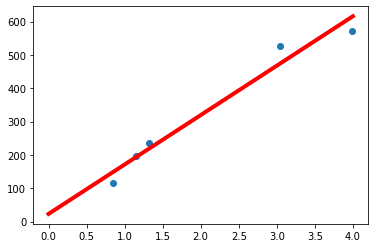

In [7]:
house = {}
house['1'] = [0.846, 115.00]
house['2'] = [1.324, 234.50]
house['3'] = [1.150, 198.00]
house['4'] = [3.037, 528.00]
house['5'] = [3.984, 572.50]

# Find summation of x_i, y_i, x_i**2, x_i*y_i
# Solve for m & c

x_i, y_i = [], []
for n in range(1,6):
    x_i.append(house[str(n)][0])
    y_i.append(house[str(n)][1])
x_i, y_i = np.array(x_i), np.array(y_i)

x_1 = x_i.sum()
y_1 = y_i.sum()
x_2 = (x_i@x_i).sum()
x_y = (x_i@y_i).sum()
n = len(x_i)

matrix_A = [[x_2, x_1], 
            [x_1, n]]
vector_b2 = [x_y, 
             y_1]
# Solve for x = [m, c] with x = (A**-1)b
q = linalg.inv(matrix_A)@vector_b2
m, c = q[0], q[1]
xs = np.linspace(0,4,5)
ys = c + m*xs
plt.plot(xs, ys, 'r', linewidth=4)
plt.scatter(x_i, y_i)
plt.show()

### Question 6

In [8]:
# number of bedrooms vector
x_j = np.array(str_to_vector("12345"))

matrix_X = []
for row in range(len(x_i)):
    matrix_X.append([])
    matrix_X[row].append(1)
    matrix_X[row].append(x_i[row])
    matrix_X[row].append(x_j[row])
matrix_X = np.vstack(matrix_X)
vector_a = linalg.solve((matrix_X.T)@(matrix_X), (matrix_X.T)@(y_i))
print(f"vector a = {vector_a}")

vector a = [  9.97566234 130.67172705  16.45635726]


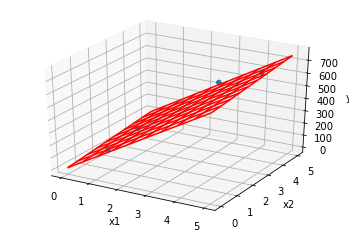

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

# Create a 3D array
# meshgrid produces all combinations of given x and y
# x goes from 0 to 5, with 10 steps
xR = np.linspace(0, 5, 10)
# y goes from 0 to 5, with 10 steps
yR = np.linspace(0, 5, 10)
# combine all x with all y
xx, yy = np.meshgrid(xR, yR)
zz = vector_a[0] + vector_a[1]*xx + vector_a[2]*yy
ax.scatter3D(x_i, x_j, y_i)
ax.plot_wireframe(xx, yy, zz, color = 'red')
plt.show()

## Exercise 3
### Question 7

In [10]:
a_0 = np.array(str_to_vector('110101')) 
b_0 = np.array(str_to_vector('110011'))

def rand_key(p): 
    key = []
    for i in range(p): 
        key.append(random.randint(0, 1))
    return(key) 

def random_vector(s, t):
    while True:
        u = rand_key(6)
        if a_0@u == s and b_0@u == t:
            return u
            break

for s in range(2):
    for t in range(2):
        vector_u = random_vector(s,t)
        print(f"vector u = {vector_u}, for s = {s} and t = {t}")

vector u = [0, 0, 0, 0, 0, 0], for s = 0 and t = 0
vector u = [0, 0, 1, 0, 1, 0], for s = 0 and t = 1
vector u = [0, 0, 1, 1, 0, 0], for s = 1 and t = 0
vector u = [0, 0, 1, 0, 0, 1], for s = 1 and t = 1


In [11]:
# Function to check if the generated vectors fulfil 
# the independency requirements

# input two lists a & b, each contains 4 vectors
# Return "True" if any 3 pairs of vectors from 
# (a1,b1),(a2,b2),(a3,b3),(a4,b4) are linearly independent
def check_dependency(a,b): 
    for v1 in range(1,3): #1st vector from 1 to 2
        for v2 in range(v1+1,4): 
            for v3 in range(v2+1,5): 
                squareMatrix = np.vstack((a[v1], b[v1], a[v2], b[v2],a[v3], b[v3]))
                determinant = np.linalg.det(squareMatrix) 
                if determinant == 0: #if determinant is 0, the vectors are not linearly dependent
                    return False

    # check if a0,b0 and any two random selected pairs of vectors are linearly independent
    for v1 in range(1,4): #1st vector from 1 to 3
        for v2 in range(v1+1,5):
            squareMatrix = np.vstack((a[0], b[0], a[v1], b[v1], a[v2], b[v2]))
            determinant = np.linalg.det(squareMatrix) 
            if determinant == 0: #if determinant is 0, the vectors are not linearly dependent
                return False
    return True

# Generate 4 a,b pairs using rand_key 
# Any 3 pairs must pass check_dependency
def generate_ab():
    while True:
        alist = [a_0]
        blist = [b_0]
        # Creates a temporary list of vectors a and b
        for i in range(4):
            alist.append(rand_key(6))
            blist.append(rand_key(6))
        if check_dependency(alist, blist) == False:
            continue
        else:
            a, b = alist[1:], blist[1:]
            return[np.vstack(a), np.vstack(b)]
            break
ab = generate_ab()
a, b = ab[0], ab[1]
print(a)
print(b)

[[0 1 0 0 1 0]
 [0 1 1 0 1 0]
 [1 0 0 0 1 1]
 [1 1 1 1 1 1]]
[[0 0 1 1 1 1]
 [0 1 1 0 0 1]
 [1 0 1 0 1 0]
 [0 0 1 0 1 1]]


In [24]:
# Function to converting String to binary array
def str_to_bits(s): 
    res = ''.join(format(ord(i), 'b') for i in s) 
    bitsArray = []
    for i in res:
        bitsArray.append(int(i))
    return bitsArray
password_raw = str_to_bits('Potter')
# 2xn matrix password
password = np.vstack(np.array_split(password_raw, len(password_raw)/2))
u_i = []
for st in password:
    u_i.append(random_vector(st[0], st[1]))


#secret vector u
print(np.vstack(u_i))

# Function to converting binary array to string
def bits_to_str(b):
    NumOfChar = int(len(b)/7)
    string = ''
    for i in range(NumOfChar):
        # 7 digits represents 1 char
        bitsChar = ''.join(str(j) for j in b[7*i:7*i+7]) 
        # convert binary to decimal
        decimalChar = int(bitsChar,2)
        #convert decimal to string
        string = string + chr(decimalChar) 
    return string
s_i = np.dot(u_i, a_0)
t_i = np.dot(u_i, b_0)
p = []
for i in range(len(s_i)):
    p.append(s_i[i])
    p.append(t_i[i])

# Just to verify u_i, s_i and t_i are correct, we check to see
# if we get back the original string
print(bits_to_str(p))

[[0 0 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 1 0]
 [0 0 1 1 0 0]
 [1 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 1 1 1 0]
 [0 0 1 0 1 0]
 [0 0 1 0 0 0]
 [1 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 0 0 0]
 [0 0 1 1 0 0]]
Potter


In [13]:
# 𝛽1 = 𝐚1⋅u 
# 𝛾1 = 𝐛1⋅u

# Function takes in a_i, b_i and  𝛽 and 𝛾
def secret_bit(a, b, u):
    beta = [i%2 for i in np.dot(a, u)]
    gamma = [j%2 for j in np.dot(b, u)]
    return [beta, gamma]

ab = generate_ab()
a, b = ab[0], ab[1]
beta_gamma = secret_bit(a, b, vector_u)
beta_i, gamma_i = beta_gamma[0], beta_gamma[1]
print(f"𝛽_i = {beta_i}")
print(f"𝛾_i = {gamma_i}")

𝛽_i = [0, 1, 0, 0]
𝛾_i = [0, 0, 1, 0]


In [27]:
# Function to generate all the 4 combinations
def comb(a, b, beta, gamma):
    # Generates a list of combinations
    arr = [0, 1, 2, 3] 
    # x = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
    x = list(combinations(arr, 3))
    combination = []
    for i in range(4):
        n = x[i]
        combi = []
        secret =  []
        for j in range(3):
            combi.append(a[n[j]])
            combi.append(b[n[j]])
            secret.append(beta[n[j]])
            secret.append(gamma[n[j]])
        combination.append([combi, secret])
    return combination

c = comb(a, b, beta_i, gamma_i)
u_j = []
for j in range(4):
    u_j.append([int(n) for n in linalg.solve(c[j][0], c[j][1])])
print(np.vstack(u_j))
print(a_0)

[[ 0  0 -1  0  0  1]
 [ 0  0 -1  0  0  1]
 [ 0  0 -1  0  0  1]
 [ 0  0 -1  0  0  1]]
[1 1 0 1 0 1]


In [15]:
s_j = np.dot(u_j, a_0)
t_j = np.dot(u_j, b_0)
p_raw = []
for i in range(len(s_i)):
    p_raw.append(s_i[i])
    p_raw.append(t_i[i])

# Return check if the resultant bits in p_raw equates to the string
print(f"raw password bits = {p_raw}")
print()
print(bits_to_str(p_raw))

raw password bits = [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]

Potter
